In [2]:
%load_ext autoreload

%autoreload 2
from experiments import *

Sigma for x1 is
 [[ 9.   3.6  4.8]
 [ 3.6 36.   4.8]
 [ 4.8  4.8 64. ]] 

Mu for x1 is
 [2, 10, 10]

Sigma for x2 is
 [[64.   4.8  2.4]
 [ 9.6 36.   3.6]
 [ 2.4  3.6  9. ]] 

Mu for x2 is\ [-2, -10, -10]

10.933000579710091
10.933000579710091
10.933000579710091


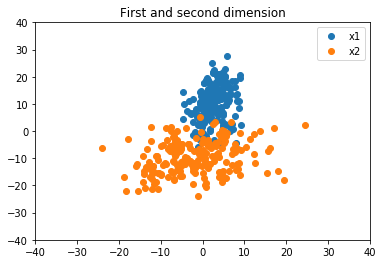

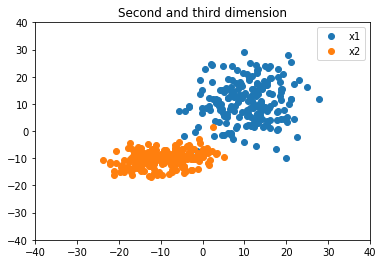

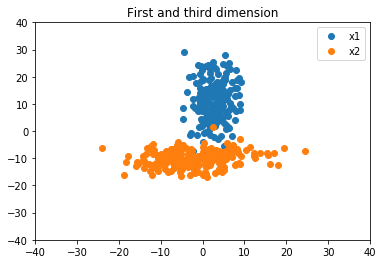

0.09999441371990393


TypeError: diagonalize() takes 10 positional arguments but 15 were given

In [3]:
a =3
b = 6
c = 8
alfa = 0.2
beta = 0.1
mu1 = [2,10,10]
mu2 = [-2,-10,-10]


sigma1 = np.array([[np.power(a,2),alfa*a*b,alfa*a*c],[alfa*a*b,np.power(b,2),beta*b*c],[alfa*a*c,beta*b*c,np.power(c,2)]])

sigma2 = np.array([[np.power(c,2),beta*b*c,beta*a*c],[alfa*b*c,np.power(b,2),alfa*a*b],[beta*a*c,alfa*a*b,np.power(a,2)]])


# sigma1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
# sigma2 = np.array([[5,0,0],[0,5,0],[0,0,5]])

w1, v1 = LA.eig(sigma1)

w2, v2 = LA.eig(sigma2)




X1 = generate_Gaussian_random_vector(mu1,sigma1,3,200)

X2 = generate_Gaussian_random_vector(mu2,sigma2,3,200)

print(f"Sigma for x1 is\n {sigma1} \n")
print(f"Mu for x1 is\n {mu1}\n")
print(f"Sigma for x2 is\n {sigma2} \n")
print(f"Mu for x2 is\ {mu2}\n")
      
      

display(X1,X2,40)

X1_test = generate_Gaussian_random_vector(mu1,sigma1,3,200)
X2_test = generate_Gaussian_random_vector(mu2,sigma2,3,200)

A,B,C = generate_classifier(sigma1,mu1,sigma2,mu2)
print(A[2,2])








X1,X2,sigma1,sigma2,mu1,mu2,v_z = diagonalize(a,b,c,alfa,beta,X1,w1,v1,X2,w2,v2,sigma1,sigma2,mu1,mu2)

display(X1,X2,10)
X1_test = generate_Gaussian_random_vector(mu1,sigma1,3,200)
X2_test = generate_Gaussian_random_vector(mu2,sigma2,3,200)



The true sigma 1 is 
[[ 9.   3.6  4.8]
 [ 3.6 36.   4.8]
 [ 4.8  4.8 64. ]]

The estimated sigma1 using ML is 
 [[ 7.98809345  4.67066647  1.663357  ]
 [ 4.67066647 39.72991701  4.43847001]
 [ 1.663357    4.43847001 55.87355699]]

The estimated mu1 using ML is 
 [[ 2.64343458 10.68044933 10.93300058]]

The true sigma 2 is 
[[64.   4.8  2.4]
 [ 9.6 36.   3.6]
 [ 2.4  3.6  9. ]]

The estimated sigma2 using ML is 
 [[64.49028407 12.13179865  4.3169236 ]
 [12.13179865 36.19909145  5.17388092]
 [ 4.3169236   5.17388092  9.19429377]]

The estimated mu2 using ML is 
 [[ -2.02936829  -9.62228307 -10.09434738]]



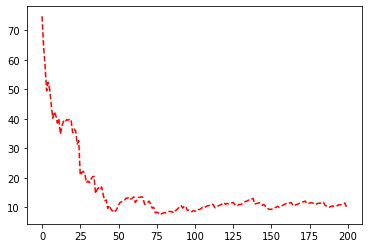

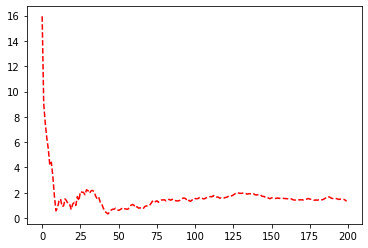

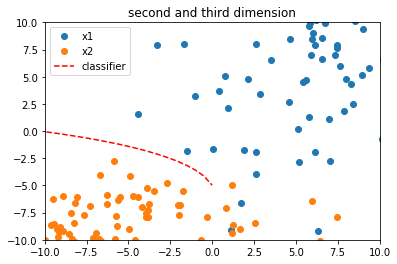

In [6]:
#### print(sigma1.shape)
# print(mu1.shape)


sigma_1,mu_1,sigma_2,mu_2 = maximumLiklihood(X1,X2)
print(f"The true sigma 1 is \n{sigma1}\n")
print(f"The estimated sigma1 using ML is \n {sigma_1}\n")
print(f"The estimated mu1 using ML is \n {mu_1.T}\n")

print(f"The true sigma 2 is \n{sigma2}\n")
print(f"The estimated sigma2 using ML is \n {sigma_2}\n")
print(f"The estimated mu2 using ML is \n {mu_2.T}\n")


sigma1_points, mu1_points = ML_points(X1,X2,sigma1,np.array([mu1]).T)
plot_points(sigma1_points,len(sigma1_points))
plot_points(mu1_points,len(mu1_points))
A,B,C = generate_classifier(sigma_1,mu_1.T[0],sigma_2,mu_2.T[0])
# z1,z2,z3 = get_points(A,B,C,0)



# display_x3(X1_test,X2_test,z1,z2,z3,10)

z1_2,z2_2,z3_2 = get_points_x1(A,B,C,1)
display_x1(X1_test,X2_test,z1_2,z2_2,z3_2,10)

Sigma 0 was chosen to be
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Mu 0 was chosen to be
 [0 0 0]
Estimated mu1 is
 [2.19149351 8.85342391 8.08175952] 
Estimated mu2 is 
 [-1.30630721 -7.95630783 -9.50761546]


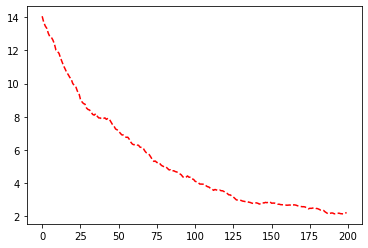

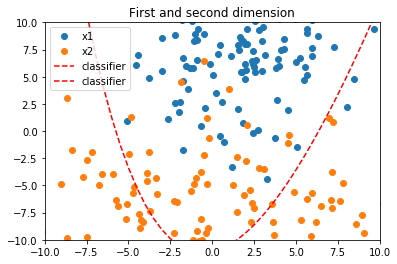

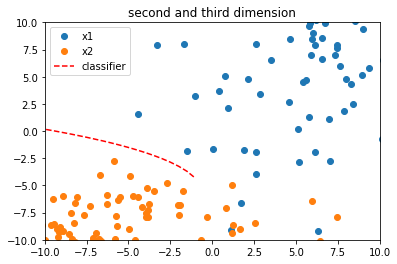

In [8]:
sigma0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
mu0 = np.array([0,0,0])

print(f"Sigma 0 was chosen to be\n {sigma0}")
print(f"Mu 0 was chosen to be\n {mu0}")
mu1_bays,mu2_bays = baysian(X1,X2,sigma1,sigma2,sigma0,mu0)
print(f"Estimated mu1 is\n {mu1_bays} ")
print(f"Estimated mu2 is \n {mu2_bays}")

mu1_points = baysian_n_points(X1,X2,sigma1,sigma2,mu1,mu2,sigma0,mu0)
plot_points(mu1_points,len(mu1_points))
A,B,C = generate_classifier(sigma1,mu1_bays,sigma2,mu2_bays)
z1,z2,z3 = get_points(A,B,C,0)
display_x3(X1_test,X2_test,z1,z2,z3,10)

z1_2,z2_2,z3_2 = get_points_x1(A,B,C,2)
display_x1(X1_test,X2_test,z1_2,z2_2,z3_2,10)

200


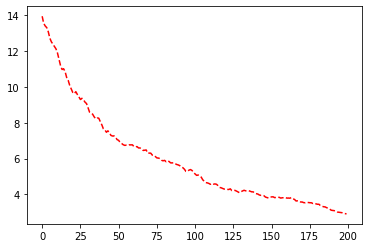

IndexError: index 1 is out of bounds for axis 0 with size 1

In [27]:
mu1_n_points = baysian_n_points(X1,X2,sigma1,sigma2,mu1,mu2,sigma0,mu0)
plot_Baysian(mu1_n_points, len(X1[0]))

A,B,C = generate_classifier(sigma1,mu_1,sigma2,mu_2)
z1,z2,z3 = get_points(A,B,C,0)

display_x3(X1_test,X2_test,z1,z2,z3,40)

200


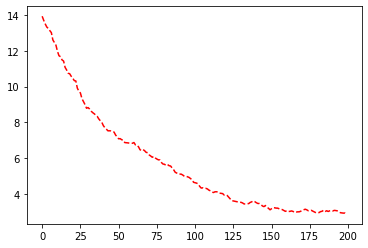

In [6]:
mu1_n_points = baysian_n_points(X1,X2,sigma1,sigma2,mu1,mu2,sigma0,mu0)
plot_Baysian(mu1_n_points, len(X1[0]))

In [15]:
sigma0 = np.array([[1,0,0],[0,1,0],[0,0,1]])
mu0 = np.array([0,0,0])
K_cross_validation(10,'Bayes',X1_test,X2_test,sigma1,sigma2,sigma0,mu0)

The accuracy for the Bayes in the 0 set is : 
80.0
The accuracy for the Bayes in the 1 set is : 
90.0
The accuracy for the Bayes in the 2 set is : 
80.0
The accuracy for the Bayes in the 3 set is : 
92.5
The accuracy for the Bayes in the 4 set is : 
85.0
The accuracy for the Bayes in the 5 set is : 
75.0
The accuracy for the Bayes in the 6 set is : 
92.5
The accuracy for the Bayes in the 7 set is : 
92.5
The accuracy for the Bayes in the 8 set is : 
92.5
The accuracy for the Bayes in the 9 set is : 
70.0
The average accuracy for the Bayes is 85.0


In [14]:
K_cross_validation(10,'ML',X1_test,X2_test,sigma1,sigma2,sigma0,mu0)

The accuracy for the ML in the 0 set is : 
82.5
The accuracy for the ML in the 1 set is : 
95.0
The accuracy for the ML in the 2 set is : 
87.5
The accuracy for the ML in the 3 set is : 
92.5
The accuracy for the ML in the 4 set is : 
90.0
The accuracy for the ML in the 5 set is : 
75.0
The accuracy for the ML in the 6 set is : 
95.0
The accuracy for the ML in the 7 set is : 
97.5
The accuracy for the ML in the 8 set is : 
97.5
The accuracy for the ML in the 9 set is : 
70.0
The average accuracy for the ML is 88.25


0
the summ of x1_dist is 1.0
The sample mean for x1, first dimension is -0.0011752059718180845
The sample varience for x1, first dimension is 0.11196239322418908
The sample mean for x2, first dimension is -0.000161267574310812
The sample varience for x2, first dimension is 0.05458635043781316
The sample mean for x1, second dimension is -0.0069660851521164534
The sample varience for x1, second dimension is 0.1447319995838529
The sample mean for x2, second dimension is 0.0063784513873389095
The sample varience for x2, second dimension is 0.1098746355104652
The sample mean for x1, third dimension is 0.004734655755589791
The sample varience for x1, third dimension is 0.10451837487338742
The sample mean for x2, third dimension is -0.004604677424741039
The sample varience for x2, third dimension is 0.19221871100604665


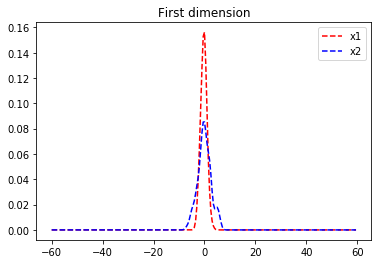

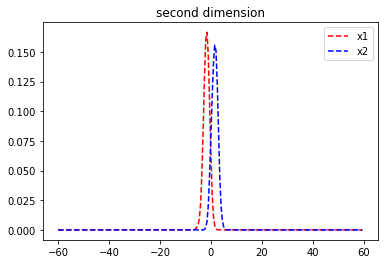

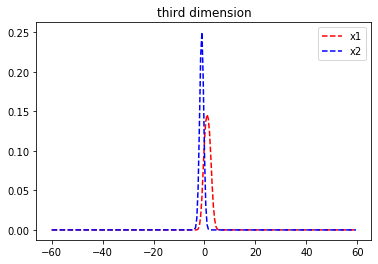

In [107]:
x1_dist,x2_dist = parzen_window_intervals(X1,X2,0.7)
plot_univariate_prob(x1_dist,x2_dist)

200
(3, 200)
(3, 200)
The sample variance for x1 is 
 [[ 2.97696647e-05  4.92303233e-05 -4.12366124e-06]
 [ 4.92303233e-05  8.14125640e-05 -6.81933029e-06]
 [-4.12366124e-06 -6.81933029e-06  5.71205025e-07]]
The sample mean for x1 is 
 [-0.00138665 -0.00819658  0.00553893]
The sample variance for x2 is 
 [[ 6.04273751e-05 -9.64023965e-05  4.86045206e-05]
 [-9.64023965e-05  1.53794899e-04 -7.75408871e-05]
 [ 4.86045206e-05 -7.75408871e-05  3.90948543e-05]]
The sample mean for x2 is 
 [-0.00026837  0.0077519  -0.00548821]


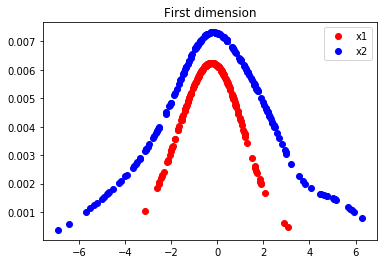

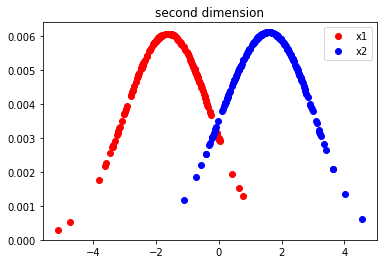

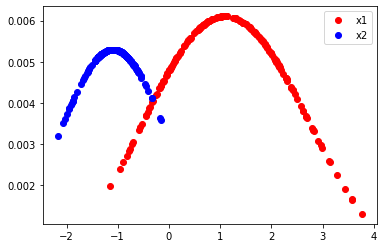

In [108]:
x1_dens,x2_dens = parzen_window_prob_density(X1,X2,1)
print(x1_dens.shape)

print(X1.shape)
plot_prob_density(x1_dens,x2_dens,X1,X2)

In [ ]:

z1,z2,z3 = get_points(A,B,C,0)

In [ ]:
print(mu1)

In [ ]:
print(sigma1)

In [ ]:
print(mu2)

In [ ]:
print(sigma2)

In [ ]:
display(X1,X2,50)

In [ ]:
z1_2,z2_2,z3_2 = get_points_x1(A,B,C,7)

In [ ]:
display(X1,X2,z1,z2,z3)
display_x1(X1,X2,z1_2,z2_2,z3_2)

In [ ]:
x1_test = generate_Gaussian_random_vector(mu1,sigma1,3,200)
x2_test = generate_Gaussian_random_vector(mu2,sigma2,3,200)

In [ ]:

test_classifier(A,B,C,x1_test,x2_test)

In [ ]:
x1_after,x2_after,sigma1_diag,sigma2_diag,mu1_diag,mu2_diag,v_z = diagonalize(a,b,c,alfa,beta,X1,w1,v1,X2,w2,v2,sigma1,sigma2,mu1,mu2)

In [ ]:
display(x1_after,x2_after,10)

In [ ]:
A_,B_,C_ = generate_classifier(sigma1_diag,mu1_diag,sigma2_diag,mu2_diag)

In [ ]:
print(np.cov(x1_after),np.cov(x2_after))

In [ ]:
z1,z2,z3 = get_points(A_,B_,C_,-1)


In [ ]:
z1_x1,z2_x1,z3_x1 = get_points_x1(A_,B_,C_,2)

In [ ]:
display_x3(x1_after,x2_after,
        z1,z2,z3)
display_x1(x1_after,x2_after,
        z1_x1,z2_x1,z3_x1)

In [ ]:
print(np.cov(x1_after))
print(np.cov(x2_after))
print(np.mean(x1_after))

In [ ]:
test_classifier(A_,B_,C_,x1_after,x2_after)

In [ ]:
x1_test_diag = diagonalize_point(x1_test,v1,w1,v2,v_z)

In [ ]:
x2_test_diag = diagonalize_point(x2_test,v1,w1,v2,v_z)

In [ ]:
test_classifier(A_,B_,C_,x1_test_diag,x2_test_diag)